In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import os
from module_loader_kitti_pose import *
import math
import json

# is_revisit

In [2]:
list_seq = [0, 2, 5, 6, 7, 8]
formatted_data = {}

f = open("/lustre/fswork/projects/rech/dki/ujo91el/code/these_place_reco/LoGG3D-Net/config/kitti_tuples/is_revisit_D-3_T-30.json",) 
data = json.load(f)
f.close()

revisit_22 = []
for i in range(len(list_seq)):
    eval_seq = list_seq[i]
    #print(str( eval_seq), data[str( eval_seq)]['0'], len(data[str( eval_seq)]) )
    eval_seq = '%02d' % eval_seq
    print(len(data[eval_seq]))
    for j in range(len(data[eval_seq])):
        revisit_22.append(data[eval_seq][j])
        
data['22'] = revisit_22

save = False
if save:
    sequence_path = '/lustre/fswork/projects/rech/dki/ujo91el/code/these_place_reco/LoGG3D-Net/config/kitti_tuples/' 
    with open(sequence_path + "is_revisit_D-3_T-30_v2.json", 'w', encoding ='utf8') as json_file: 
            json.dump(data, json_file, allow_nan=False)
            print("saved dictio", sequence_path + "is_revisit_D-3_T-30_v2.json") 

4541
4661
2761
1101
1101
4071


# poses

In [12]:
list_seq = [0, 2, 5, 6, 7, 8]
ud_content = []

for i in range(len(list_seq)):
    eval_seq = list_seq[i]

    WORK_PATH = "/lustre/fsn1/worksf/projects/rech/dki/ujo91el"
    kitti_dir = WORK_PATH+"/datas/datasets/"
    
    eval_seq = '%02d' % eval_seq
    print("eval_seq ", eval_seq)
    sequence_path = kitti_dir + 'sequences/' + eval_seq + '/'
    file = open(sequence_path +"poses.txt", "r")
    
    content=file.readlines()
    print(content[-1])
    file.close()

    tfs, pose = load_poses_from_txt(sequence_path + 'poses.txt')

    min_bbox = np.min(pose,0) 
    print("min_bbox  ",min_bbox )

    
    data = content
    shift = i*1000
    updated_strings = []
    for row in data:
        # Split the string into a list of numbers
        numbers = row.split()
        # Convert the last three elements to floats, add 1000, and format back to scientific notation
    
        numbers[3] = str(float(numbers[3]) + shift - min_bbox[0] )
        numbers[7] = str(float(numbers[7]) + shift - min_bbox[2])
        numbers[11] = str(float(numbers[11]) + shift - min_bbox[1])
        # Join the updated numbers back into a single string
        updated_strings.append(" ".join(numbers))
    ud_content.append(updated_strings)

save = False
if save:
    with open('/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/poses.txt', 'w') as f:
        for seq in range(len(list_seq)):
            for line in ud_content[seq]:
                f.write("%s\n" % line)
                print(line)

eval_seq  00
9.989093e-01 -9.331753e-03 -4.575093e-02 -5.583931e+00 8.633629e-03 9.998436e-01 -1.543319e-02 -3.562758e+00 4.588779e-02 1.502136e-02 9.988336e-01 9.696153e+01

min_bbox   [-271.2806   -17.60491  -22.29466]
eval_seq  02
6.808971e-01 2.896301e-02 -7.318062e-01 1.214574e+02 5.181616e-02 9.948086e-01 8.758347e-02 -2.062162e+01 7.305437e-01 -9.755469e-02 6.758615e-01 9.162210e+02

min_bbox   [ -0.7001992 -25.46063   -57.58387  ]
eval_seq  05
9.986568e-01 2.151376e-02 4.713539e-02 -4.804541e+00 -2.125353e-02 9.997560e-01 -6.015357e-03 -1.099719e+01 -4.725330e-02 5.005483e-03 9.988704e-01 3.702569e+02

min_bbox   [-253.1216   -55.83354  -12.09207]
eval_seq  06
9.997879e-01 2.044351e-02 2.478338e-03 -1.807621e+00 -2.044671e-02 9.997901e-01 1.267676e-03 -6.541554e+00 -2.451902e-03 -1.318080e-03 9.999961e-01 3.002232e+02

min_bbox   [ -21.38358  -156.6903     -6.541554]
eval_seq  07
9.821853e-01 2.567392e-02 -1.861530e-01 -1.643555e+00 -2.411462e-02 9.996526e-01 1.063629e-02 -1.91

# view pose

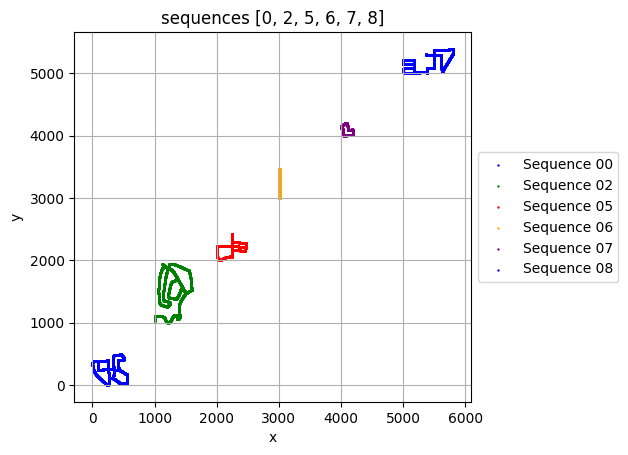

In [13]:
eval_dataset = 'Kitti'

list_seq = [0, 2, 5, 6, 7, 8]
colors = ['blue', 'green', 'red', 'orange', 'purple'] 

fig = plt.figure()
ax = plt.subplot(111)

list_all_ids = []
list_all_pose = []

for i in range(len(list_seq)):
    eval_seq = list_seq[i]
    color = colors[i % len(colors)]  # Cycle through colors
   
    WORK_PATH = "/lustre/fsn1/worksf/projects/rech/dki/ujo91el"
    kitti_dir = WORK_PATH+"/datas/datasets/"
    
    eval_seq = '%02d' % eval_seq
    sequence_path = kitti_dir + 'sequences/' + eval_seq + '/'
    tfs, pose = load_poses_from_txt(sequence_path + 'poses.txt')

    min_bbox = np.min(pose,0) 
    pose = pose - min_bbox

    pose += i*1000

    for query in range(len(pose)):
        list_all_ids.append(eval_seq + '%06d' % query)
        list_all_pose.append(pose[query])

    x, z, y = pose[:,0], pose[:,1], pose[:,2]

    plt.scatter(x, z, color=color, s=0.5, label=f"Sequence {eval_seq}")
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("sequences "+str(list_seq))
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid()
plt.show()

# positive_sequence_D-3_T-0

In [15]:
def rename_revisit(data):
    list_seq = [0, 2, 5, 6, 7, 8]
    
    sum_id = 0
    formatted_data = {}
    for seq, indices in data.items():
        if not int(seq) in list_seq:
            continue
            
        print(seq, sum_id)
        # Format the sequence key
        formatted_seq = seq
        formatted_data[formatted_seq] = {}
        
        for idx, values in indices.items():
            # Format the index key and combine it with the formatted sequence
            formatted_idx = '%06d' % ( int(idx) + sum_id ) 
            # Format each value in the list to also include the sequence
            formatted_values = ['%06d' % ( int(v) + sum_id) for v in values]
            # Add to the new dictionary
            formatted_data[formatted_seq][formatted_idx] = formatted_values
        sum_id += len(data[str(seq)])
    return formatted_data


In [16]:
# rename and save positive_sequence_D-3_T-0.json
f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/00/positive_sequence_D-3_T-0.json",) 
data = json.load(f)
f.close()
formatted_data = rename_revisit(data)

save = False
if save:
    with open(sequence_path + "positive_sequence_D-3_T-0.json", 'w', encoding ='utf8') as json_file: 
        json.dump(formatted_data, json_file, allow_nan=False) 
    print("saved dictio", sequence_path + "positive_sequence_D-3_T-0.json")

0 0
2 4541
5 9202
6 11963
7 13064
8 14165


In [17]:
# rename and save positive_sequence_D-20_T-0.json 
f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/00/positive_sequence_D-20_T-0.json",) 
data = json.load(f)
f.close()
formatted_data = rename_revisit(data)

save = False
if save:
    with open(sequence_path + "positive_sequence_D-20_T-0.json", 'w', encoding ='utf8') as json_file: 
        json.dump(formatted_data, json_file, allow_nan=False) 
    print("saved dictio", sequence_path + "positive_sequence_D-20_T-0.json")

0 0
2 4541
5 9202
6 11963
7 13064
8 14165


# GPS for sequence 22

In [37]:
# save GPS 
gpsround = 100
def label2gps(label_id, positions_database) :
    label_id_gps = positions_database[int(label_id)]
    xx = round(label_id_gps[0]*gpsround)
    yy = round(label_id_gps[1]*gpsround)
    xx_str = f'{xx:05}'
    yy_str = f'{yy:05}'
    res_str = ''.join(x + y for x, y in zip(xx_str, yy_str))
    res_str += xx_str[len(yy_str):] + yy_str[len(xx_str):]
    return res_str

 

dictio = {}
for i in range(len(list_all_pose)):
    print( '%06d' % i, label2gps(i, list_all_pose))
    if label2gps(i, list_all_pose) in dictio:
        continue
    dictio[label2gps(i, list_all_pose)] = '%06d' % i

sequence_path = '/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/' 
with open(sequence_path + "dict_gps_2_label_v2.json", 'w', encoding ='utf8') as json_file: 
        json.dump(dictio, json_file, allow_nan=False) 
        print("saved dictio", sequence_path + "dict_gps_2_label_v2.json")

000000 2071172680
000001 2071182436
000002 2071191392
000003 2072101148
000004 2072110094
000005 2072110950
000006 2072120705
000007 2072039651
000008 2072049417
000009 2072058363
000010 2072068119
000011 2072077075
000012 2072077920
000013 2072086776
000014 2072096622
000015 2073005487
000016 2073015334
000017 2073024281
000018 2073034038
000019 2073033977
000020 2073043827
000021 2073052778
000022 2073062619
000023 2073071660
000024 2073081512
000025 2073090465
000026 2074000308
000027 2064919351
000028 2064928296
000029 2064938240
000030 2064947195
000031 2064957140
000032 2064966096
000033 2064976053
000034 2064986000
000035 2064985958
000036 2064995916
000037 2065904964
000038 2065914913
000039 2065923954
000040 2065932999
000041 2065952023
000042 2065961058
000043 2065970191
000044 2065980124
000045 2065899157
000046 2066808189
000047 2066818220
000048 2066827240
000049 2066836280
000050 2066846220
000051 2066855250
000052 2066864188
000053 2066874116
000054 2066883144
000055 206

# matching

In [ ]:
list_seq = [0, 2, 5, 6, 7, 8]


sum_id = 0
formatted_data = {}
for seq, indices in data.items():
    if not int(seq) in list_seq:
        continue
        
    print(seq, sum_id)
    # Format the sequence key
    formatted_seq = seq
    formatted_data[formatted_seq] = {}
    
    for idx, values in indices.items():
        # Format the index key and combine it with the formatted sequence
        formatted_idx = '%06d' % ( int(idx) + sum_id ) 
        # Format each value in the list to also include the sequence
        formatted_values = ['%06d' % ( int(v) + sum_id) for v in values]
        # Add to the new dictionary
        formatted_data[formatted_seq][formatted_idx] = formatted_values
    sum_id += len(data[str(seq)])

In [44]:
list_seq = [0, 2, 5, 6, 7, 8]
formatted_data = {}

f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/00/positive_sequence_D-20_T-0.json",) 
data2 = json.load(f)
f.close()

sum_id = 0
for i in range(len(list_seq)):
    eval_seq = list_seq[i]
    
    f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/" + '%02d' % eval_seq + "/matching.json",) 
    data = json.load(f)
    f.close()
    for key, value_lists in data.items():
        formatted_key = '%06d' % ( int(key) + sum_id)
        formatted_data[formatted_key] = []
        for value_list in value_lists:
            # Format each value in the nested lists
            formatted_values = ['%06d' % ( int(v) + sum_id) for v in values]
            formatted_data[formatted_key] = [formatted_values, value_lists[1]]
    sum_id += len(data2[str(eval_seq)])


# Print the result
from pprint import pprint
pprint(formatted_data)

save = False
if save:
    with open(sequence_path + "matching.json", 'w', encoding ='utf8') as json_file: 
        json.dump(formatted_data, json_file, allow_nan=False)
    print("saved dictio", sequence_path + "matching.json") 

{'001562': [['004067', '004068', '004069'],
            [3.087,
             3.129,
             3.435,
             3.56,
             3.69,
             3.71,
             3.729,
             3.799,
             3.805,
             3.938]],
 '001563': [['004067', '004068', '004069'],
            [3.343,
             3.366,
             3.394,
             3.452,
             3.505,
             3.529,
             3.573,
             3.629,
             3.654,
             3.751]],
 '001564': [['004067', '004068', '004069'],
            [3.042,
             3.044,
             3.11,
             3.119,
             3.223,
             3.258,
             3.375,
             3.429,
             3.558,
             3.653]],
 '001565': [['004067', '004068', '004069'],
            [2.77,
             2.779,
             2.828,
             2.843,
             2.955,
             2.965,
             3.107,
             3.159,
             3.315,
             3.379]],
 '001566': [['004067'

'\nsequence_path = \'/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/\' \nwith open(sequence_path + "matching.json", \'w\', encoding =\'utf8\') as json_file: \n        json.dump(formatted_data, json_file, allow_nan=False)\n        print("saved dictio", sequence_path + "matching.json") '

In [53]:
list_seq = [0, 2, 5, 6, 7, 8]
formatted_data = {}

f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/00/positive_sequence_D-20_T-0.json",) 
data2 = json.load(f)
f.close()

sum_id = 0
for i in range(len(list_seq)):
    eval_seq = list_seq[i]
    
    f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/" + '%02d' % eval_seq + "/matching.json",) 
    data = json.load(f)
    f.close()
    for key, value_lists in data.items():
        formatted_key = '%06d' % ( int(key) + sum_id)
        formatted_data[formatted_key] = []
        #import pdb; pdb.set_trace()
        for value_list in value_lists:
            # Format each value in the nested lists
            formatted_values = ['%06d' % ( int(v) + sum_id) for v in value_lists[0]]
            formatted_data[formatted_key] = [formatted_values, value_lists[1]]
    sum_id += len(data2[str(eval_seq)])

# Print the result
from pprint import pprint
pprint(formatted_data)

sequence_path = '/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/' 
with open(sequence_path + "matching.json", 'w', encoding ='utf8') as json_file: 
        json.dump(formatted_data, json_file, allow_nan=False)
        print("saved dictio", sequence_path + "matching.json")

{'001562': [['004535',
             '004536',
             '004534',
             '004537',
             '000115',
             '000116',
             '000114',
             '000117',
             '000113',
             '000112'],
            [3.087,
             3.129,
             3.435,
             3.56,
             3.69,
             3.71,
             3.729,
             3.799,
             3.805,
             3.938]],
 '001563': [['000116',
             '000115',
             '000117',
             '000114',
             '000118',
             '004535',
             '000113',
             '004536',
             '000119',
             '000112'],
            [3.343,
             3.366,
             3.394,
             3.452,
             3.505,
             3.529,
             3.573,
             3.629,
             3.654,
             3.751]],
 '001564': [['000116',
             '000117',
             '000118',
             '000115',
             '000119',
             '000114',

In [18]:
f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/matching.json",) 
data = json.load(f)
f.close()
data

{'003644': [['000700',
   '000699',
   '000701',
   '000698',
   '000702',
   '000703',
   '000697',
   '000704',
   '000696',
   '000705'],
  [0.694, 1.143, 1.189, 1.987, 2.008, 2.867, 2.91, 3.73, 3.867, 4.589]],
 '003405': [['002453',
   '000400',
   '002452',
   '000399',
   '000401',
   '002454',
   '000398',
   '002451',
   '000402',
   '002455'],
  [0.285, 0.441, 0.609, 0.64, 0.858, 0.935, 1.209, 1.312, 1.411, 1.659]],
 '003407': [['002454',
   '000402',
   '000401',
   '002455',
   '002453',
   '000403',
   '000400',
   '002456',
   '000404',
   '000399'],
  [0.287, 0.522, 0.561, 0.605, 0.943, 0.952, 1.047, 1.326, 1.456, 1.632]],
 '003510': [['000521',
   '000520',
   '000522',
   '000519',
   '000523',
   '000518',
   '000524',
   '000517',
   '000525',
   '000526'],
  [0.556, 0.581, 0.811, 0.889, 1.156, 1.308, 1.519, 1.773, 1.876, 2.221]],
 '003842': [['000938',
   '000939',
   '000937',
   '000940',
   '000936',
   '000941',
   '000942',
   '000935',
   '000943',
   '000934']

# positive_sequence_D-3_T-0.

In [22]:
# ok

list_seq = [0, 2, 5, 6, 7, 8]
formatted_data = {}

f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/00/positive_sequence_D-3_T-0.json",) 
data = json.load(f)
f.close()
sum_id = 0
for i in range(len(list_seq)):
    eval_seq = list_seq[i]
    
    data_seq = data[str(eval_seq)]
    #eval_seq = '%02d' % eval_seq

    for key, value_lists in data_seq.items():
        formatted_key = int(key) + sum_id
        if formatted_key in formatted_data:
            import pdb; pdb.set_trace()
        formatted_values = [ int(v) + sum_id for v in value_lists]
        formatted_data[formatted_key] = formatted_values
        
    sum_id += len(data[str( eval_seq )])


# Print the result
from pprint import pprint
#pprint(formatted_data)
data['22'] = formatted_data
sequence_path = '/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/' 
with open(sequence_path + "positive_sequence_D-3_T-0.json", 'w', encoding ='utf8') as json_file: 
        json.dump(data, json_file, allow_nan=False)
        print("saved dictio", sequence_path + "positive_sequence_D-3_T-0.json") 

saved dictio /lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/positive_sequence_D-3_T-0.json


# positive_sequence_D-20_T-0

In [24]:
# ok

list_seq = [0, 2, 5, 6, 7, 8]
formatted_data = {}

f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/00/positive_sequence_D-20_T-0.json",) 
data = json.load(f)
f.close()
sum_id = 0
for i in range(len(list_seq)):
    eval_seq = list_seq[i]
    
    data_seq = data[str(eval_seq)]
    #eval_seq = '%02d' % eval_seq

    for key, value_lists in data_seq.items():
        formatted_key = int(key) + sum_id
        if formatted_key in formatted_data:
            import pdb; pdb.set_trace()
        formatted_values = [ int(v) + sum_id for v in value_lists]
        formatted_data[formatted_key] = formatted_values
        
    sum_id += len(data[str( eval_seq )])


# Print the result
from pprint import pprint
#pprint(formatted_data)
data['22'] = formatted_data
sequence_path = '/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/' 
with open(sequence_path + "positive_sequence_D-20_T-0.json", 'w', encoding ='utf8') as json_file: 
        json.dump(data, json_file, allow_nan=False)
        print("saved dictio", sequence_path + "positive_sequence_D-20_T-0.json") 

saved dictio /lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/positive_sequence_D-20_T-0.json


In [25]:
formatted_data

{0: [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  4395,
  4396,
  4397,
  4398,
  4399,
  4400,
  4401,
  4402,
  4403,
  4404,
  4405,
  4406,
  4407,
  4408,
  4409,
  4410,
  4411,
  4412,
  4413,
  4414,
  4415,
  4416,
  4417,
  4418,
  4419,
  4420,
  4421,
  4422,
  4423,
  4424,
  4425,
  4426,
  4427,
  4428,
  4429,
  4430,
  4431,
  4432,
  4433,
  4434,
  4435,
  4436,
  4437,
  4438,
  4439,
  4440,
  4441,
  4442,
  4443,
  4444,
  4445,
  4446,
  4447,
  4448,
  4449,
  4450,
  4451,
  4452,
  4453,
  4454,
  4455,
  4456,
  4457,
  4458,
  4459,
  4460,
  4461,
  4462,
  4463,
  4464,
  4465,
  4466,
  4467,
  4468,
  4469,
  4470,
  4471],
 1: [0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  4396,
  4397,
  4398,
  4399,
  4400,
  4401,
  4402,
  4403,
  4404,
  4405,
  4406,
  4407,
  4408,
  4409,
  4410,
  441

In [80]:
list_seq = [0, 2, 5, 6, 7, 8]
formatted_data = {}

f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/00/positive_sequence_D-20_T-0.json",) 
data = json.load(f)
f.close()

sum_id = 0
formatted_data = {}
for seq, indices in data.items():
    if not int(seq) in list_seq:
        continue
        
    print(seq, sum_id)
    # Format the sequence key
    formatted_seq = seq
    formatted_data[formatted_seq] = {}
    
    for idx, values in indices.items():
        # Format the index key and combine it with the formatted sequence
        formatted_idx = int(idx) + sum_id  
        # Format each value in the list to also include the sequence
        formatted_values = [ int(v) + sum_id for v in values]
        # Add to the new dictionary
        formatted_data[formatted_idx] = formatted_values
    sum_id += len(data[str(seq)])
    
data = {}
# Print the result
from pprint import pprint
#pprint(formatted_data)
data['22'] = formatted_data
sequence_path = '/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/' 
with open(sequence_path + "positive_sequence_D-20_T-0.json", 'w', encoding ='utf8') as json_file: 
        json.dump(data, json_file, allow_nan=False)
        print("saved dictio", sequence_path + "positive_sequence_D-20_T-0.json") 

0 0
2 4541
5 9202
6 11963
7 13064
8 14165
saved dictio /lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/22/positive_sequence_D-20_T-0.json


In [71]:
f = open("/lustre/fsn1/worksf/projects/rech/dki/ujo91el/datas/datasets/sequences/00/positive_sequence_D-20_T-0.json",) 
data = json.load(f)
f.close()
data['0']

{'0': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  4395,
  4396,
  4397,
  4398,
  4399,
  4400,
  4401,
  4402,
  4403,
  4404,
  4405,
  4406,
  4407,
  4408,
  4409,
  4410,
  4411,
  4412,
  4413,
  4414,
  4415,
  4416,
  4417,
  4418,
  4419,
  4420,
  4421,
  4422,
  4423,
  4424,
  4425,
  4426,
  4427,
  4428,
  4429,
  4430,
  4431,
  4432,
  4433,
  4434,
  4435,
  4436,
  4437,
  4438,
  4439,
  4440,
  4441,
  4442,
  4443,
  4444,
  4445,
  4446,
  4447,
  4448,
  4449,
  4450,
  4451,
  4452,
  4453,
  4454,
  4455,
  4456,
  4457,
  4458,
  4459,
  4460,
  4461,
  4462,
  4463,
  4464,
  4465,
  4466,
  4467,
  4468,
  4469,
  4470,
  4471],
 '1': [0,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  4396,
  4397,
  4398,
  4399,
  4400,
  4401,
  4402,
  4403,
  4404,
  4405,
  4406,
  4407,
  4408,
  4409,
  4410,
 